In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [27]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [28]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)
geography, gender

(      Germany  Spain
 0       False  False
 1       False   True
 2       False  False
 3       False  False
 4       False   True
 ...       ...    ...
 9995    False  False
 9996    False  False
 9997    False  False
 9998     True  False
 9999    False  False
 
 [10000 rows x 2 columns],
        Male
 0     False
 1     False
 2     False
 3     False
 4     False
 ...     ...
 9995   True
 9996   True
 9997  False
 9998   True
 9999  False
 
 [10000 rows x 1 columns])

In [31]:
X = pd.concat([X,geography,gender ], axis= 1)
X = X.drop(['Geography', 'Gender'], axis=1)


KeyError: "['Geography' 'Gender'] not found in axis"

In [32]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False,False,True,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True,False,False,True,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True,False,False,True,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False,False,False,False,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True,True,False,True,True,False,True


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# sequential library is responsible is used to create neural netork
# dense is used to create hidden layer

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [48]:
classifier = Sequential()

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dropout(0,3))
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dropout(0,4))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5963 - loss: 0.7037 - val_accuracy: 0.7955 - val_loss: 0.5282
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7995 - loss: 0.5038 - val_accuracy: 0.7955 - val_loss: 0.4820
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8012 - loss: 0.4509 - val_accuracy: 0.7955 - val_loss: 0.4583
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7967 - loss: 0.4435 - val_accuracy: 0.7970 - val_loss: 0.4400
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7982 - loss: 0.4255 - val_accuracy: 0.7955 - val_loss: 0.4285
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8081 - loss: 0.4133 - val_accuracy: 0.8099 - val_loss: 0.4175
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8152 - loss: 0.4063 - val_accuracy: 0.8194 - val_loss: 0.4086
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8368 - loss: 0.3764 - val_accu

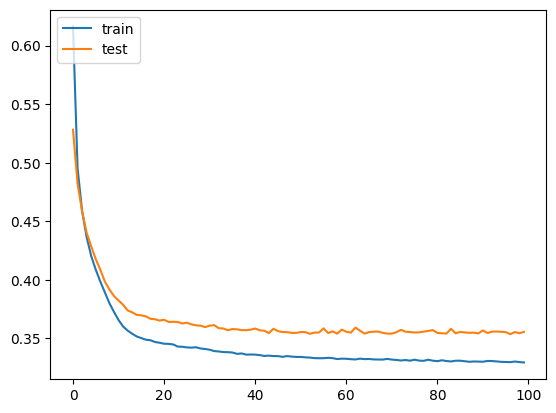

In [49]:
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [50]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.865